In [1]:
import re
import csv
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
%matplotlib inline

In [67]:
df = pd.read_csv('newdata.CSV',encoding='Utf-8',engine='python')
df.dropna(inplace=True)

In [68]:
df.head()

,Item #,Description,Sales,Discounts,Gross Sales,Returns,Net Sales,Cost,Profit,Margin,%Returns,QOH Sold,QOH Returned,%Returns.1,Net Sold,Turnover
0,#4020,PICA-DRY PENCIL REFILLS,19.98,1.00,18.98,0.0,18.98,12.34,6.64,35.0,0.0,2.0,0.0,0.0,2.0,0.0
1,#4030,PICA DRY REFILL SET GRAPHITE (10),99.90,0.00,99.90,0.0,99.90,72.20,27.70,27.7,0.0,10.0,0.0,0.0,10.0,0.0
2,-12-,"12"" MAGNETIC BROOM",16.99,0.00,16.99,0.0,16.99,8.85,8.14,47.9,0.0,1.0,0.0,0.0,1.0,0.2
3,-88003-,DUPLEX REC PLATE WHITE,8.95,0.36,8.59,0.0,8.59,1.40,7.19,83.7,0.0,5.0,0.0,0.0,5.0,2.3
5,0-136,DT IRON SCRUB BRUSH SCRUB BUDDIES,15.96,0.40,15.56,0.0,15.56,6.00,9.56,61.4,0.0,4.0,0.0,0.0,4.0,0.8


In [29]:
df[['Item #', 'Sales','Profit','Margin','Net Sold']]

,Item #,Sales,Profit,Margin,Net Sold
0,#4020,19.98,6.64,35.0,2.0
1,#4030,99.90,27.70,27.7,10.0
2,-12-,16.99,8.14,47.9,1.0
3,-88003-,8.95,7.19,83.7,5.0
5,0-136,15.96,9.56,61.4,4.0
...,...,...,...,...,...
4541,ZN25112L,27.99,14.99,53.6,1.0
4542,ZN25300L,107.98,53.24,49.3,2.0
4543,ZSB4U405,29.97,18.77,64.8,3.0
4544,ZSB4U410,59.94,59.94,100.0,6.0


In [35]:
topten = df.sort_values('Sales',ascending=False).head(10)

<AxesSubplot:xlabel='count', ylabel='Sales'>

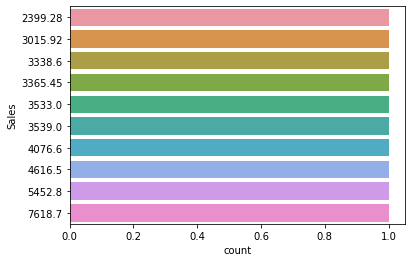

In [65]:
sns.countplot(data=topten, y=topten['Sales'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

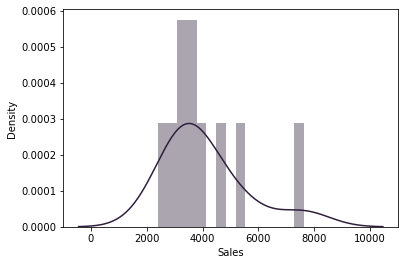

In [44]:
sns.distplot(topten['Sales'],bins=15)

In [47]:
topten = topten[['Item #','Sales','Profit','Margin']]

In [48]:
topten

,Item #,Sales,Profit,Margin
602,12STD,7618.70,1717.00,22.8
995,248S,5452.80,2427.82,45.2
4164,RAMBOARD,4616.50,1391.04,30.6
1300,34STD,4076.60,1120.60,27.9
3173,DELIVERY,3539.00,1813.50,51.2
1033,2610S,3533.00,908.12,25.7
4171,REBAR58,3365.45,685.87,20.7
1292,34FORMPLY,3338.60,427.68,13.6
984,2410S,3015.92,959.79,31.8
3087,CONC,2399.28,640.94,27.1


<AxesSubplot:xlabel='Sales', ylabel='Item #'>

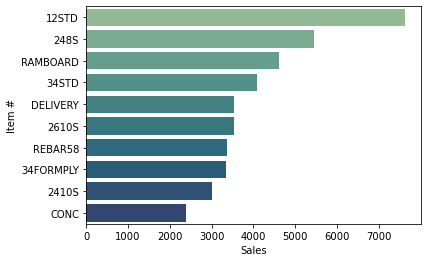

In [61]:
sns.barplot(x='Sales',y='Item #',data=topten,palette='crest', orient='h')

## 248 Detailing

In [100]:
df248 = pd.read_csv('248s_feb2023.csv',sep=',',header=None,encoding='Utf-8', engine='python')
df248

,0,1,2,3,4,5,6,7,8,9
0,00087B,CASH,02/25/2023,6.00,PIECE,"1,080.00",34.56,20.00,14.56,42.1
1,00437B,CASH,02/27/2023,15.00,PIECE,"1,080.00",86.40,50.00,36.40,42.1
2,00531B,CASH,02/27/2023,10.00,PIECE,"1,080.00",57.60,33.33,24.27,42.1
3,00607B,KORERES,02/27/2023,6.00,PIECE,"1,080.00",34.56,20.00,14.56,42.1
4,00614B,CASH,02/27/2023,1.00,PIECE,"1,080.00",5.76,3.33,2.43,42.2
...,...,...,...,...,...,...,...,...,...,...
207,──────────,──────────────,──────────────,──────────────,───────\r\n,None,NaN,NaN,NaN,NaN
208,2023/02,Totals:,883.00,"5,370.88","2,943.06","2,427.82",45.20,NaN,NaN,NaN
209,──────────,──────────────,──────────────,──────────────,───────\r\n,None,NaN,NaN,NaN,NaN
210,2023/02 - 2023/02,TOTALS:,883.00,"5,370.88","2,943.06","2,427.82",45.20,NaN,NaN,NaN


In [101]:
df248.dropna(inplace=True)

In [102]:
mapper = ({0:'Invoice',
           1:'customer#',
           2:'invoicedate',
           3:'qty',
           4:'UOM',
           5:'netprice',
           6:'Total',
           7:'COGS',
           8:'Profit',
           9:'Margin'})

In [103]:
df248 = df248.rename(columns=mapper)

In [90]:
df248.invoicedate = pd.to_datetime(df248.invoicedate)

In [128]:
byday = df248.set_index('day')

<AxesSubplot:xlabel='count', ylabel='day'>

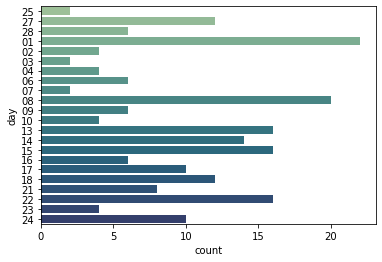

In [144]:
sns.countplot(y=byday['day'],data=byday,palette='crest',orient='h')

In [132]:
df248['day'] = df248.invoicedate.apply(lambda x: getday(x))

In [121]:
def getday(date):
    
    work = date.split('/')
    
    return work[1]        

In [119]:
work = df248.invoicedate[0].split('/')

In [120]:
work

[' 02', '25', '2023']

In [135]:
byday['day'] = byday.invoicedate.apply(lambda x: getday(x))